In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Data Understanding

In [2]:
#reading and displaying the dataset
online = pd.read_csv('/kaggle/input/online-retail-customer-churn-dataset/online_retail_customer_churn.csv')
online.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


In [3]:
#checking on the type of dataset
type(online)

pandas.core.frame.DataFrame

In [4]:
#checking the number of rows and columns
online.shape

(1000, 15)

In [5]:
#checking the data types
online.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int64
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

In [6]:
#checking if there any missing values presented in the dataset
online.isna().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

- No missing values in this dataset.

In [7]:
#checking for the unique values in each columns
uniqueValues = online.nunique()
uniqueValues

Customer_ID                   1000
Age                             52
Gender                           3
Annual_Income                  972
Total_Spend                   1000
Years_as_Customer               19
Num_of_Purchases                99
Average_Transaction_Amount     988
Num_of_Returns                  10
Num_of_Support_Contacts          5
Satisfaction_Score               5
Last_Purchase_Days_Ago         337
Email_Opt_In                     2
Promotion_Response               3
Target_Churn                     2
dtype: int64

# Exploratory Data Analysis

In [8]:
#importing neccesery libraries
import matplotlib.pyplot as plt
import seaborn as sn

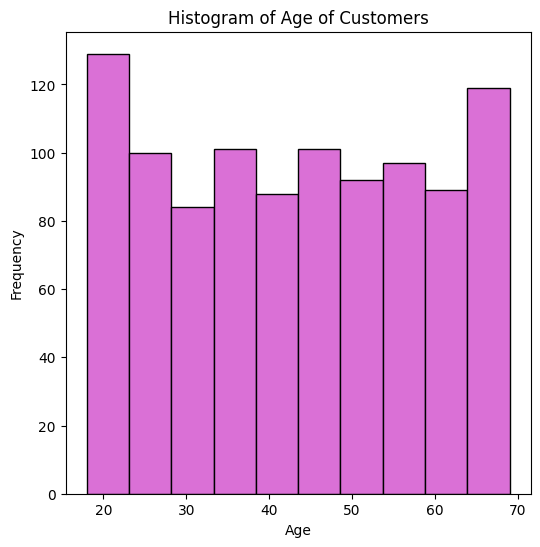

In [9]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Age'], color='orchid', edgecolor='black')
plt.title('Histogram of Age of Customers')  
plt.xlabel('Age')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Gender')

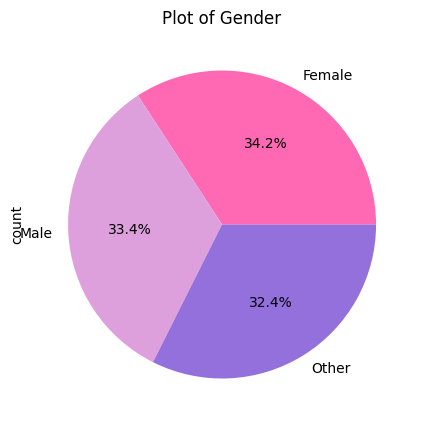

In [10]:
colors = ['hotpink','plum', 'mediumpurple']
gender = online['Gender'].value_counts()
gender.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Gender')

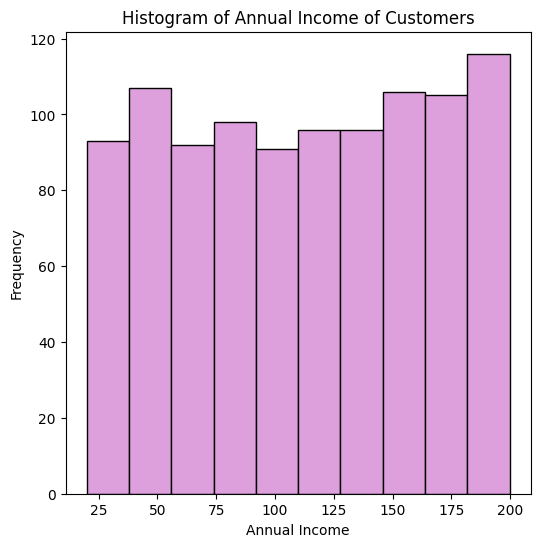

In [11]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Annual_Income'], color='plum', edgecolor='black')
plt.title('Histogram of Annual Income of Customers')  
plt.xlabel('Annual Income')  
plt.ylabel('Frequency')   
plt.show()

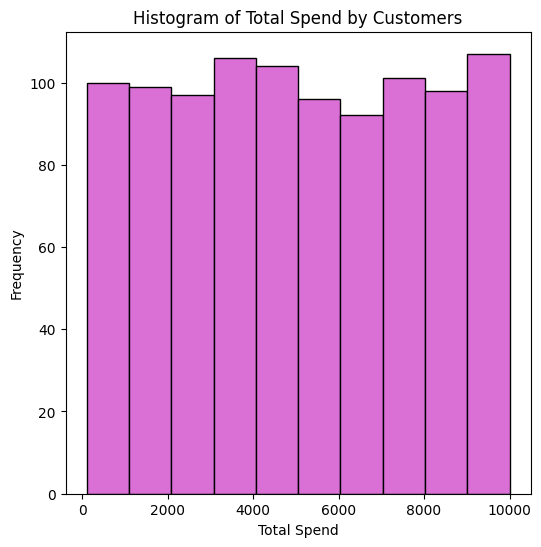

In [12]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Total_Spend'], color='orchid', edgecolor='black')
plt.title('Histogram of Total Spend by Customers')  
plt.xlabel('Total Spend')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Years as Customer')

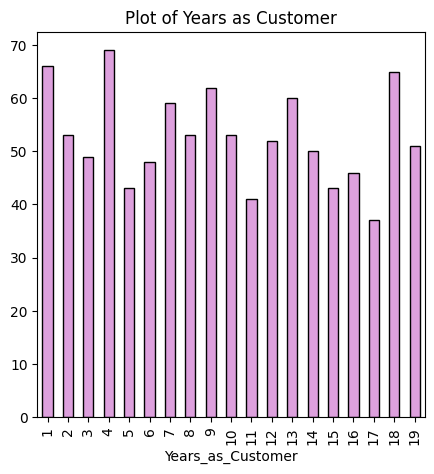

In [13]:
customer_years = online['Years_as_Customer'].value_counts().sort_index()
customer_years.plot(kind = 'bar', color= ['plum'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Years as Customer')

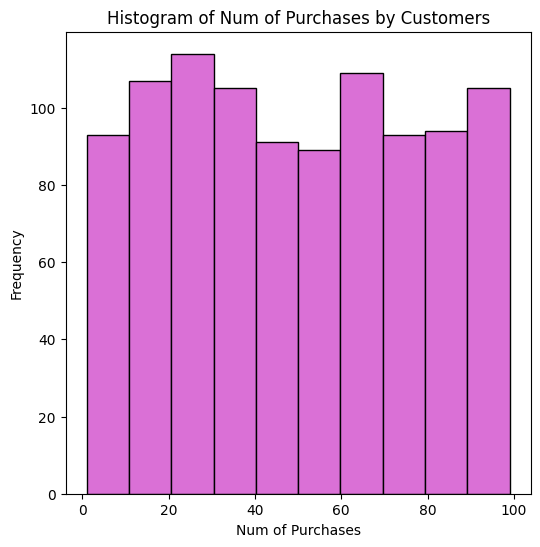

In [14]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Num_of_Purchases'], color='orchid', edgecolor='black')
plt.title('Histogram of Num of Purchases by Customers')  
plt.xlabel('Num of Purchases')  
plt.ylabel('Frequency')   
plt.show()

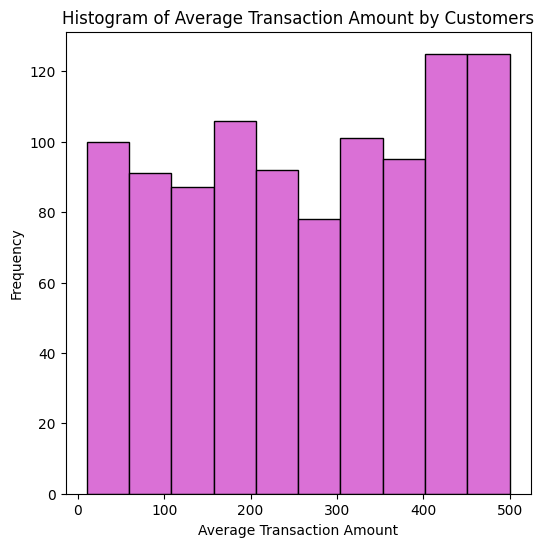

In [15]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Average_Transaction_Amount'], color='orchid', edgecolor='black')
plt.title('Histogram of Average Transaction Amount by Customers')  
plt.xlabel('Average Transaction Amount')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Number of Returns by Customers')

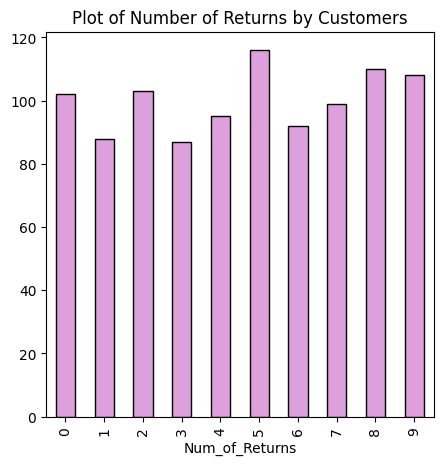

In [16]:
returns = online['Num_of_Returns'].value_counts().sort_index()
returns.plot(kind = 'bar', color= ['plum'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Number of Returns by Customers')

Text(0.5, 1.0, 'Plot of Number of Support Contacts by Customers')

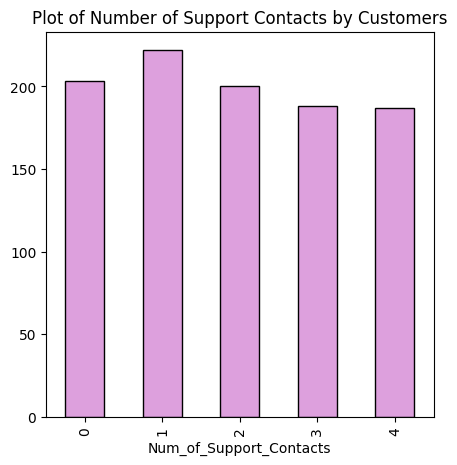

In [17]:
contacts = online['Num_of_Support_Contacts'].value_counts().sort_index()
contacts.plot(kind = 'bar', color= ['plum'], edgecolor='black', figsize = (5,5))
plt.title('Plot of Number of Support Contacts by Customers')

Text(0.5, 1.0, 'Plot of Satisfaction Score')

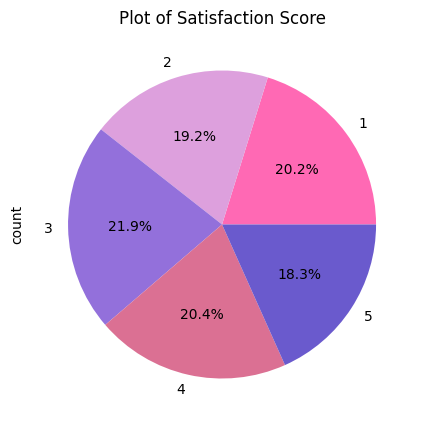

In [18]:
colors = ['hotpink','plum', 'mediumpurple', 'palevioletred', 'slateblue']
score = online['Satisfaction_Score'].value_counts().sort_index()
score.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Satisfaction Score')

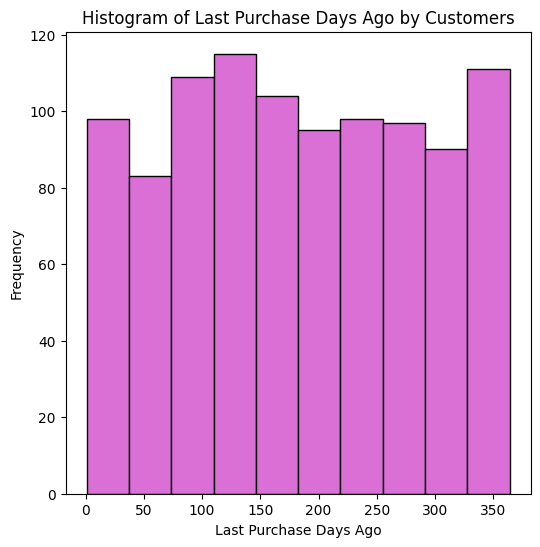

In [19]:
plt.figure(figsize=(6, 6))  
plt.hist(online['Last_Purchase_Days_Ago'], color='orchid', edgecolor='black')
plt.title('Histogram of Last Purchase Days Ago by Customers')  
plt.xlabel('Last Purchase Days Ago')  
plt.ylabel('Frequency')   
plt.show()

Text(0.5, 1.0, 'Plot of Email Option')

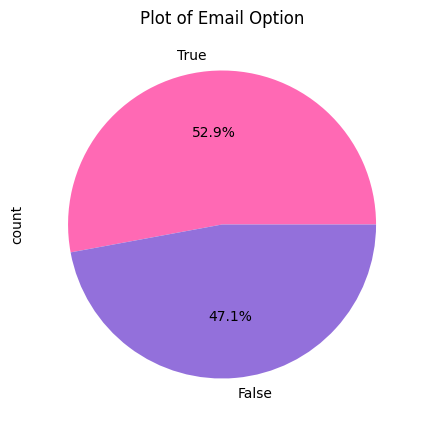

In [20]:
colors = ['hotpink','mediumpurple']
email = online['Email_Opt_In'].value_counts()
email.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Email Option')

Text(0.5, 1.0, 'Plot of Promotion Response Given by Customers')

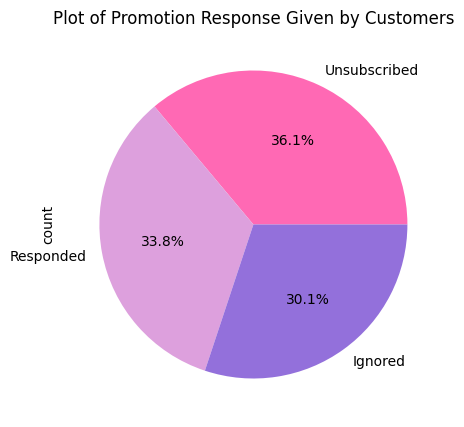

In [21]:
colors = ['hotpink','plum', 'mediumpurple']
promotion = online['Promotion_Response'].value_counts()
promotion.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Promotion Response Given by Customers')

Text(0.5, 1.0, 'Plot of Target Churn')

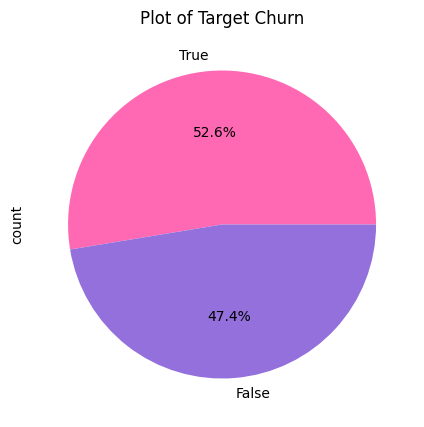

In [22]:
colors = ['hotpink','mediumpurple']
churn = online['Target_Churn'].value_counts()
churn.plot(kind = 'pie', figsize = (5,5), colors=colors, autopct='%1.1f%%')
plt.title('Plot of Target Churn')

# Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
columns = ['Gender', 'Email_Opt_In', 'Promotion_Response', 'Target_Churn']
label_encoder = LabelEncoder()
for col in columns:
    online[col + '_encoded'] = label_encoder.fit_transform(online[col])
online = online.drop(columns=columns)

In [25]:
online.head()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Gender_encoded,Email_Opt_In_encoded,Promotion_Response_encoded,Target_Churn_encoded
0,1,62,45.15,5892.58,5,22,453.80,2,0,3,129,2,1,1,1
1,2,65,79.51,9025.47,13,77,22.90,2,2,3,227,1,0,1,0
2,3,18,29.19,618.83,13,71,50.53,5,2,2,283,1,0,1,1
3,4,21,79.63,9110.30,3,33,411.83,5,3,5,226,2,1,0,1
4,5,21,77.66,5390.88,15,43,101.19,3,0,5,242,2,0,2,0


# Modelling

In [26]:
X = online.drop(['Customer_ID', 'Target_Churn_encoded'], axis=1)
Y = online['Target_Churn_encoded']

In [27]:
#To balance the imbalanced class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
Xtrain_balanced, Ytrain_balanced = smote.fit_resample(X, Y)
print("Balanced Xtrain shape:", Xtrain_balanced.shape)
print("Balanced Ytrain shape:", Ytrain_balanced.shape)

Balanced Xtrain shape: (1052, 13)
Balanced Ytrain shape: (1052,)


In [28]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain_balanced, Ytrain_balanced, random_state=123, test_size=0.2)

In [29]:
Xtrain.shape

(841, 13)

In [30]:
Xtest.shape

(211, 13)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtrain

array([[ 1.59085594,  1.106591  ,  1.21490297, ...,  0.04240945,
         0.96609178,  1.15338284],
       [-0.63877521, -0.78875434,  0.81322843, ..., -1.1874645 ,
        -1.03509834,  1.15338284],
       [ 0.8039273 ,  1.54381641, -1.29561375, ...,  0.04240945,
         0.96609178, -1.32425437],
       ...,
       [-0.63877521,  1.23331746, -1.35309651, ..., -1.1874645 ,
        -1.03509834, -0.08543577],
       [ 1.06623685, -0.68002228,  0.84124922, ..., -1.1874645 ,
        -1.03509834, -1.32425437],
       [-0.04857873,  0.7267915 ,  1.06265696, ...,  0.04240945,
        -1.03509834, -0.08543577]])

In [33]:
Xtest = scaler.transform(Xtest)
Xtest

array([[-1.03223953, -1.5699789 ,  1.66046891, ..., -1.1874645 ,
        -1.03509834, -1.32425437],
       [-0.31088828,  0.89410405, -1.41361244, ..., -1.1874645 ,
         0.96609178, -1.32425437],
       [ 0.47604037, -1.54643305, -0.86325345, ...,  1.27228339,
        -1.03509834, -1.32425437],
       ...,
       [-0.83550737,  1.49155611,  1.63234994, ..., -1.1874645 ,
         0.96609178,  1.15338284],
       [ 1.3285464 , -0.43786372,  1.52190785, ...,  0.04240945,
         0.96609178, -0.08543577],
       [-0.11415612,  1.25973475, -1.10101813, ...,  1.27228339,
        -1.03509834, -0.08543577]])

## Naive Bayes 

In [34]:
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB()                       
model_NB.fit(Xtrain, Ytrain)                  
NB_model = model_NB.predict(Xtest)

In [35]:
from sklearn.metrics import accuracy_score
acc_NB = accuracy_score(Ytest, NB_model)
acc_NB

0.5023696682464455

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, NB_model))

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       108
           1       0.49      0.44      0.46       103

    accuracy                           0.50       211
   macro avg       0.50      0.50      0.50       211
weighted avg       0.50      0.50      0.50       211



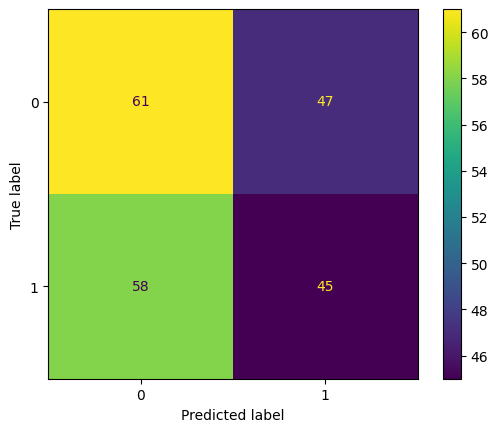

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_NB = confusion_matrix(Ytest, NB_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_NB, display_labels = model_NB.classes_)
disp.plot()

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier 
model_RF = RandomForestClassifier()                       
model_RF.fit(Xtrain, Ytrain)                  
RF_model = model_RF.predict(Xtest) 

In [39]:
acc_RF = accuracy_score(Ytest, RF_model)
acc_RF

0.5545023696682464

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, RF_model))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       108
           1       0.54      0.53      0.54       103

    accuracy                           0.55       211
   macro avg       0.55      0.55      0.55       211
weighted avg       0.55      0.55      0.55       211



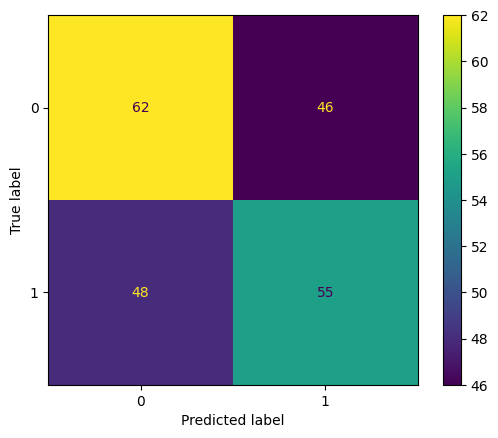

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_RF = confusion_matrix(Ytest, RF_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = model_RF.classes_)
disp.plot()

## Logistic Regression

In [42]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model_LR = linear_model.LogisticRegression()
model_LR.fit(Xtrain, Ytrain)
LR_model = model_LR.predict(Xtest)

In [43]:
acc_LR = accuracy_score(Ytest, LR_model)
acc_LR

0.4786729857819905

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, LR_model))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51       108
           1       0.46      0.42      0.44       103

    accuracy                           0.48       211
   macro avg       0.48      0.48      0.48       211
weighted avg       0.48      0.48      0.48       211



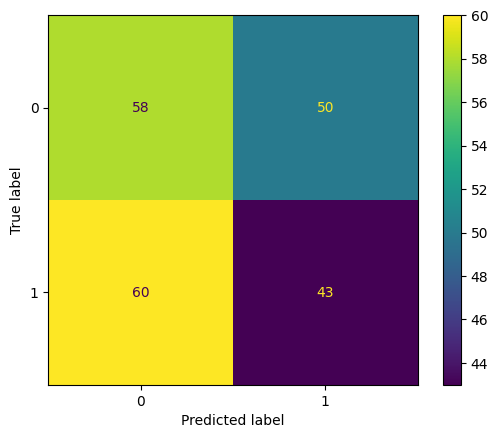

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_LR = confusion_matrix(Ytest, LR_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_LR, display_labels = model_LR.classes_)
disp.plot()

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(Xtrain, Ytrain)
DT_model = model_DT.predict(Xtest)

In [47]:
acc_DT = accuracy_score(Ytest, DT_model)
acc_DT

0.5402843601895735

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, DT_model))

              precision    recall  f1-score   support

           0       0.54      0.63      0.58       108
           1       0.53      0.45      0.49       103

    accuracy                           0.54       211
   macro avg       0.54      0.54      0.54       211
weighted avg       0.54      0.54      0.54       211



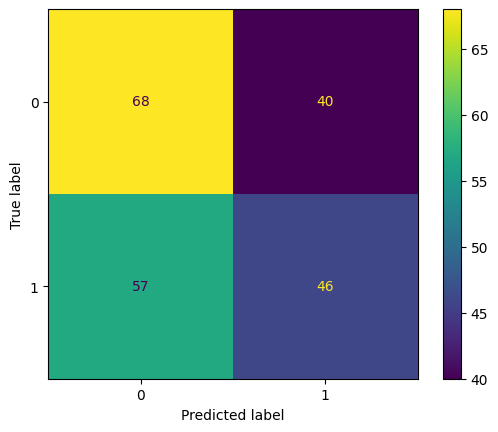

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_DT = confusion_matrix(Ytest, DT_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_DT, display_labels = model_DT.classes_)
disp.plot()

## K-Nearest Neighbor

In [50]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,Ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != Ytest))

Text(0, 0.5, 'Error Rate')

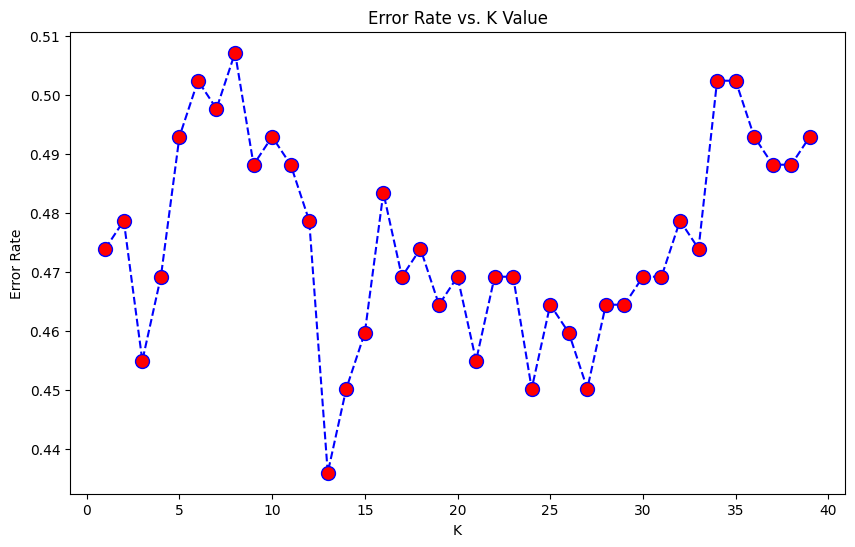

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy: 0.5639810426540285 at K = 13


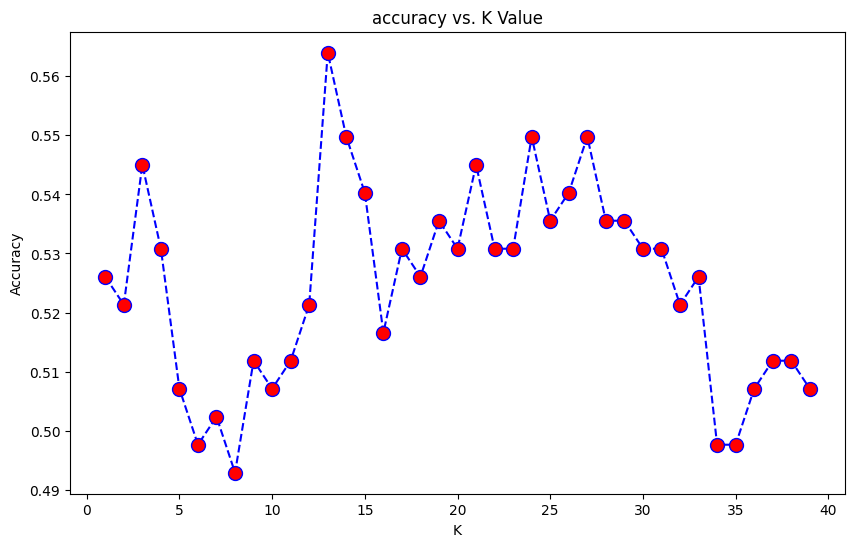

In [52]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(Xtrain,Ytrain)
    yhat = neigh.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
max_accuracy = max(acc)
optimal_k_value = acc.index(max_accuracy) + 1
print("Maximum accuracy:",max_accuracy,"at K =", optimal_k_value)

- The optimal k-value is 13 based on the above charts.

In [53]:
knn = KNeighborsClassifier(n_neighbors=13)
model_KNN = knn.fit(Xtrain, Ytrain)
KNN_model = knn.predict(Xtest)

In [54]:
acc_KNN = accuracy_score(Ytest, KNN_model)
acc_KNN

0.5639810426540285

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, KNN_model))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59       108
           1       0.56      0.52      0.54       103

    accuracy                           0.56       211
   macro avg       0.56      0.56      0.56       211
weighted avg       0.56      0.56      0.56       211



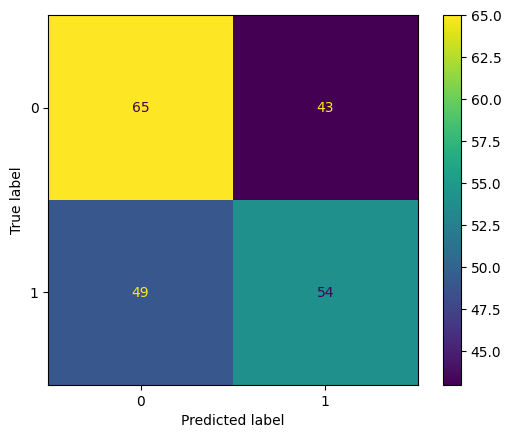

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_KNN = confusion_matrix(Ytest, KNN_model)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_KNN, display_labels = model_KNN.classes_)
disp.plot()

# Evaluation

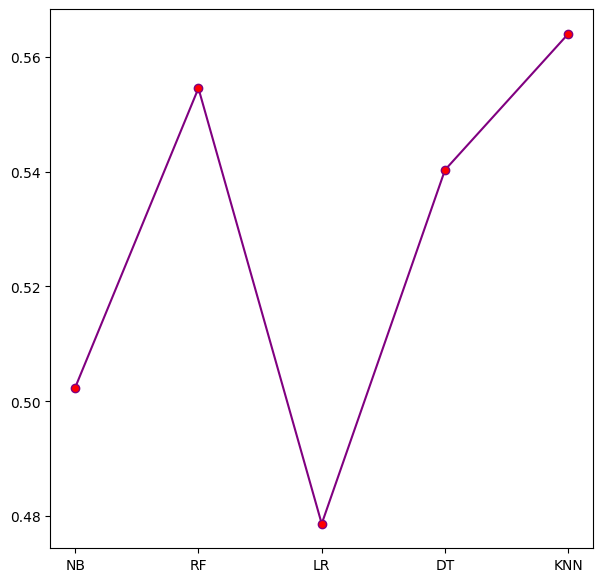

In [57]:
plt.rcParams["figure.figsize"] = [7,7]
acc = [acc_NB, acc_RF, acc_LR, acc_DT, acc_KNN]
models = ['NB', 'RF', 'LR', 'DT', 'KNN']

plt.plot(models,acc, color = 'purple', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()

- KNN performs best according to the evaluation conducted.